In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.lines import Line2D

# Visualização da localização das usinas elétricas no Brasil

Fontes:
- https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
- https://geopandas.org/en/v0.9.0/docs/user_guide/mapping.html
- https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
- https://www.freecodecamp.org/news/how-to-change-legend-fontsize-in-matplotlib

#### Leitura do conjunto processado de dados referente aos empreendimentos de geração de energia elétrica no Brasil

In [3]:
df_usinas = pd.read_csv(r"..\Dados tratados\LISTA - USINAS.csv", encoding = "utf-8")
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


In [4]:
df_usinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21912 entries, 0 to 21911
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DatGeracaoConjuntoDados       21912 non-null  object 
 1   NomEmpreendimento             21912 non-null  object 
 2   IdeNucleoCEG                  21912 non-null  int64  
 3   CodCEG                        21912 non-null  object 
 4   SigUFPrincipal                21912 non-null  object 
 5   SigTipoGeracao                21912 non-null  object 
 6   DscFaseUsina                  21912 non-null  object 
 7   DscOrigemCombustivel          21912 non-null  object 
 8   DscFonteCombustivel           21912 non-null  object 
 9   DscTipoOutorga                21912 non-null  object 
 10  NomFonteCombustivel           21912 non-null  object 
 11  DatEntradaOperacao            21912 non-null  object 
 12  MdaPotenciaOutorgadaKw        21912 non-null  float64
 13  M

In [5]:
df_usinas = df_usinas[(df_usinas["DscFaseUsina"]=="Operação")]
df_usinas.head()

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,01/09/2023,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,0,Não,-20.124799,-43.870203,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
1,01/09/2023,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,0,Não,-20.131873,-43.876935,07/07/2000,07/07/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
2,01/09/2023,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,0,Não,-20.137545,-43.891926,31/08/2000,31/08/2030,100% para ANGLOGOLD ASHANTI CÓRREGO DO SÍTIO M...,41 - Das Velhas - Sao Francisco,NOVA LIMA - MG
3,01/09/2023,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,45200,Não,-29.064753,-51.674942,15/03/2001,13/11/2039,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,BENTO GONÇALVES - RS
4,01/09/2023,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,510,Não,-27.823775,-52.069997,NaN,NaN,100% para Cooperativa de Geração de Energia e ...,72 - Uruguai. Inhanduva. Peixe e outros,FLORIANO PEIXOTO - RS


In [6]:
df_usinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21912 entries, 0 to 21911
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DatGeracaoConjuntoDados       21912 non-null  object 
 1   NomEmpreendimento             21912 non-null  object 
 2   IdeNucleoCEG                  21912 non-null  int64  
 3   CodCEG                        21912 non-null  object 
 4   SigUFPrincipal                21912 non-null  object 
 5   SigTipoGeracao                21912 non-null  object 
 6   DscFaseUsina                  21912 non-null  object 
 7   DscOrigemCombustivel          21912 non-null  object 
 8   DscFonteCombustivel           21912 non-null  object 
 9   DscTipoOutorga                21912 non-null  object 
 10  NomFonteCombustivel           21912 non-null  object 
 11  DatEntradaOperacao            21912 non-null  object 
 12  MdaPotenciaOutorgadaKw        21912 non-null  float64
 13  M

#### Contagem do número de empreendimentos de geração agrupadas por fonte de energia

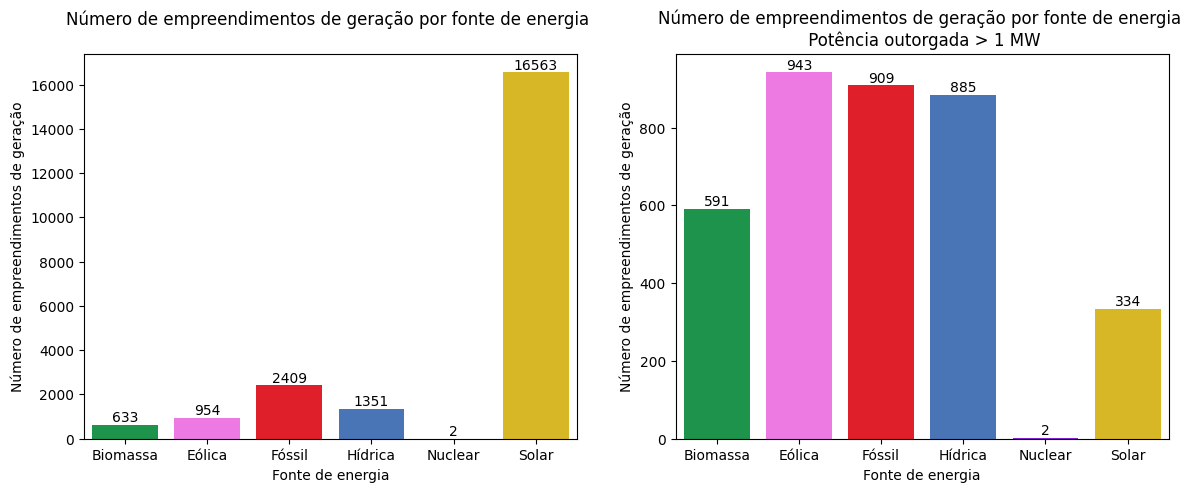

In [7]:
colors = ["#0aa648", "#ff67f1", "#ff000d", "#3771c8", "#9300ff", "#f5ca0a"]

figura, (eixo1, eixo2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,5))
sns.barplot(ax=eixo1, 
            data=df_usinas.groupby(["DscOrigemCombustivel"]).agg(count=("DscOrigemCombustivel","count")), 
            x="DscOrigemCombustivel", 
            y="count",
            hue = "DscOrigemCombustivel",
            palette = colors);
eixo1.set(xlabel = "Fonte de energia", ylabel = "Número de empreendimentos de geração");
eixo1.ticklabel_format(style='plain', axis='y')
eixo1.set_title("Número de empreendimentos de geração por fonte de energia \n");

# Selecionando as usinas com potência outorgada maior que 1 MW
df_usinas_maiores = df_usinas[(df_usinas["MdaPotenciaOutorgadaKw"]>1000)]
sns.barplot(ax=eixo2, 
            data=df_usinas_maiores.groupby(["DscOrigemCombustivel"]).agg(count=("DscOrigemCombustivel","count")),
            x="DscOrigemCombustivel", 
            y="count",
            hue = "DscOrigemCombustivel",
            palette = colors);
eixo2.set(xlabel = "Fonte de energia", ylabel = "Número de empreendimentos de geração");
eixo2.ticklabel_format(style='plain', axis='y')
eixo2.set_title("Número de empreendimentos de geração por fonte de energia \n Potência outorgada > 1 MW");

# Fonte: https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
for c1, c2 in zip(eixo1.containers, eixo2.containers):
    eixo1.bar_label(c1,)
    eixo2.bar_label(c2,)

#### Potência outorgada total por tipo de empreendimento de geração

In [14]:
df_usinas["MdaPotenciaOutorgadaGw"] = df_usinas["MdaPotenciaOutorgadaKw"] / 1000000
df_usinas["MdaPotenciaOutorgadaMw"] = df_usinas["MdaPotenciaOutorgadaKw"] / 1000
df_usinas["MdaPotenciaOutorgadaGw"]

0        0.001400
1        0.003972
2        0.001440
3        0.100000
4        0.000720
           ...   
21907    0.000086
21908    0.000042
21909    0.000700
21910    0.000150
21911    0.000999
Name: MdaPotenciaOutorgadaGw, Length: 21912, dtype: float64

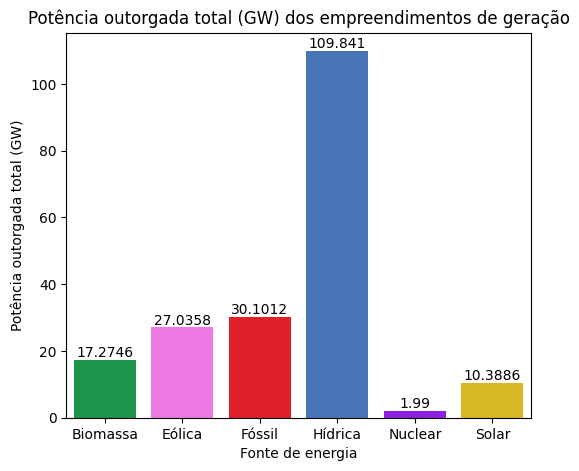

In [15]:
colors = ["#0aa648", "#ff67f1", "#ff000d", "#3771c8", "#9300ff", "#f5ca0a"]

figura, eixo1 = plt.subplots(figsize=(6,5))

sns.barplot(ax = eixo1,
            data=df_usinas.groupby(["DscOrigemCombustivel"]).agg(potencia_outorgada_gw=("MdaPotenciaOutorgadaGw","sum")),
            x="DscOrigemCombustivel",
            y="potencia_outorgada_gw",
            hue="DscOrigemCombustivel",
            palette=colors
           );
eixo1.set(xlabel = "Fonte de energia", ylabel = "Potência outorgada total (GW)");
eixo1.ticklabel_format(style='plain', axis='y')
eixo1.set_title("Potência outorgada total (GW) dos empreendimentos de geração");

# Fonte: https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
for c1 in eixo1.containers:
    eixo1.bar_label(c1,)

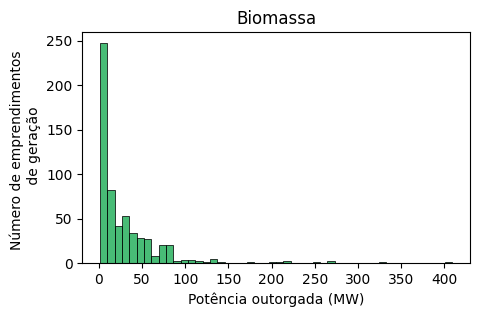

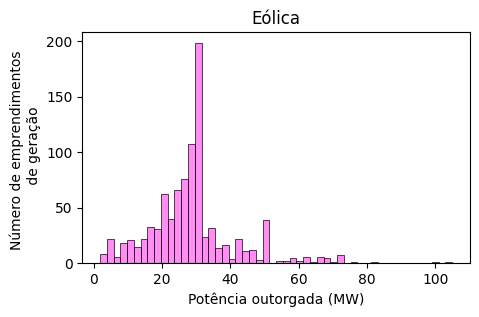

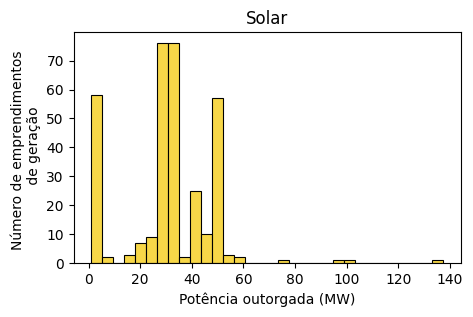

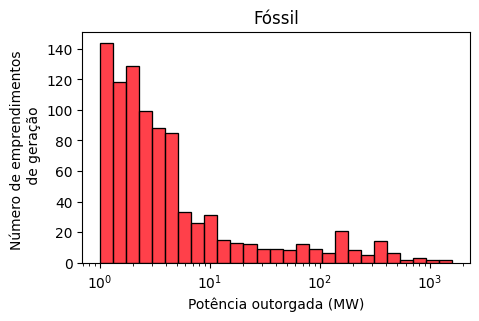

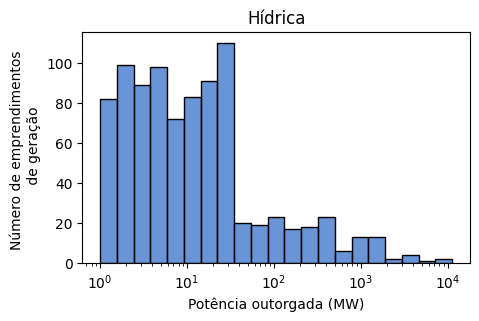

In [16]:
df_usinas_maiores = df_usinas[(df_usinas["MdaPotenciaOutorgadaKw"]>1000)]

colors = ["#0aa648", "#ff67f1", "#f5ca0a", "#ff000d", "#3771c8"]
fontes = ["Biomassa", "Eólica", "Solar", "Fóssil", "Hídrica"]


for color, fonte in zip(colors, fontes):
    figura, eixo = plt.subplots(figsize=(5,3))

    if (fonte == "Fóssil" or fonte == "Hídrica"):
        log_scale = True
    else:
        log_scale = False
        
    sns.histplot(ax = eixo,
            data=df_usinas_maiores[df_usinas_maiores["DscOrigemCombustivel"]==fonte],
            x="MdaPotenciaOutorgadaMw",
            color = color,
            log_scale = log_scale
           );    
    eixo.set(xlabel = "Potência outorgada (MW)", ylabel = "Número de emprendimentos \n de geração");
    eixo.set_title(fonte);



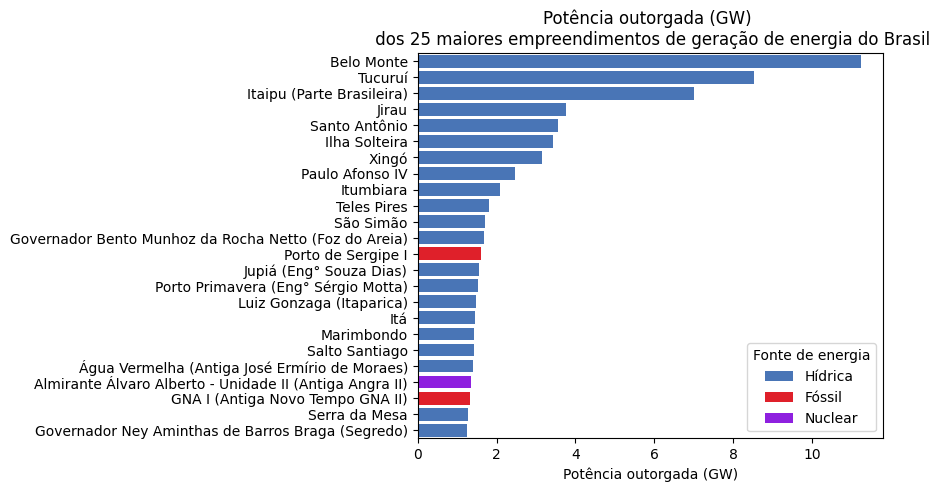

In [17]:
df_25_maiores_usinas = df_usinas_maiores.sort_values(by=["MdaPotenciaOutorgadaGw"], ascending=False)

df_25_maiores_usinas = df_25_maiores_usinas.iloc[0:24]
df_25_maiores_usinas.head(25)

colors = ["#3771c8", "#ff000d", "#9300ff"]

figura, eixo1 = plt.subplots(figsize=(6,5))

sns.barplot(ax = eixo1,
            data=df_25_maiores_usinas,
            x="MdaPotenciaOutorgadaGw",
            y="NomEmpreendimento",
            hue="DscOrigemCombustivel",
            palette=colors
           );
eixo1.set(xlabel = "Potência outorgada (GW)", ylabel = None);
eixo1.set_title("Potência outorgada (GW) \n dos 25 maiores empreendimentos de geração de energia do Brasil");
eixo1.legend(title='Fonte de energia');

#### Visualização da localização dos empreendimentos de geração no mapa do Brasil

In [75]:
brasil_map = gpd.read_file(r"..\Dados brutos\IBGE\Shapefiles\BR_UF_2021\BR_UF_2021.shp")

<Axes: >

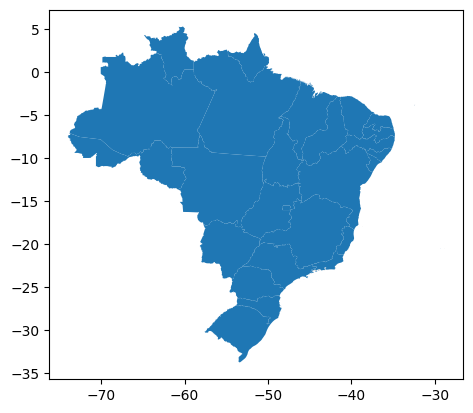

In [76]:
brasil_map.plot()

<Axes: >

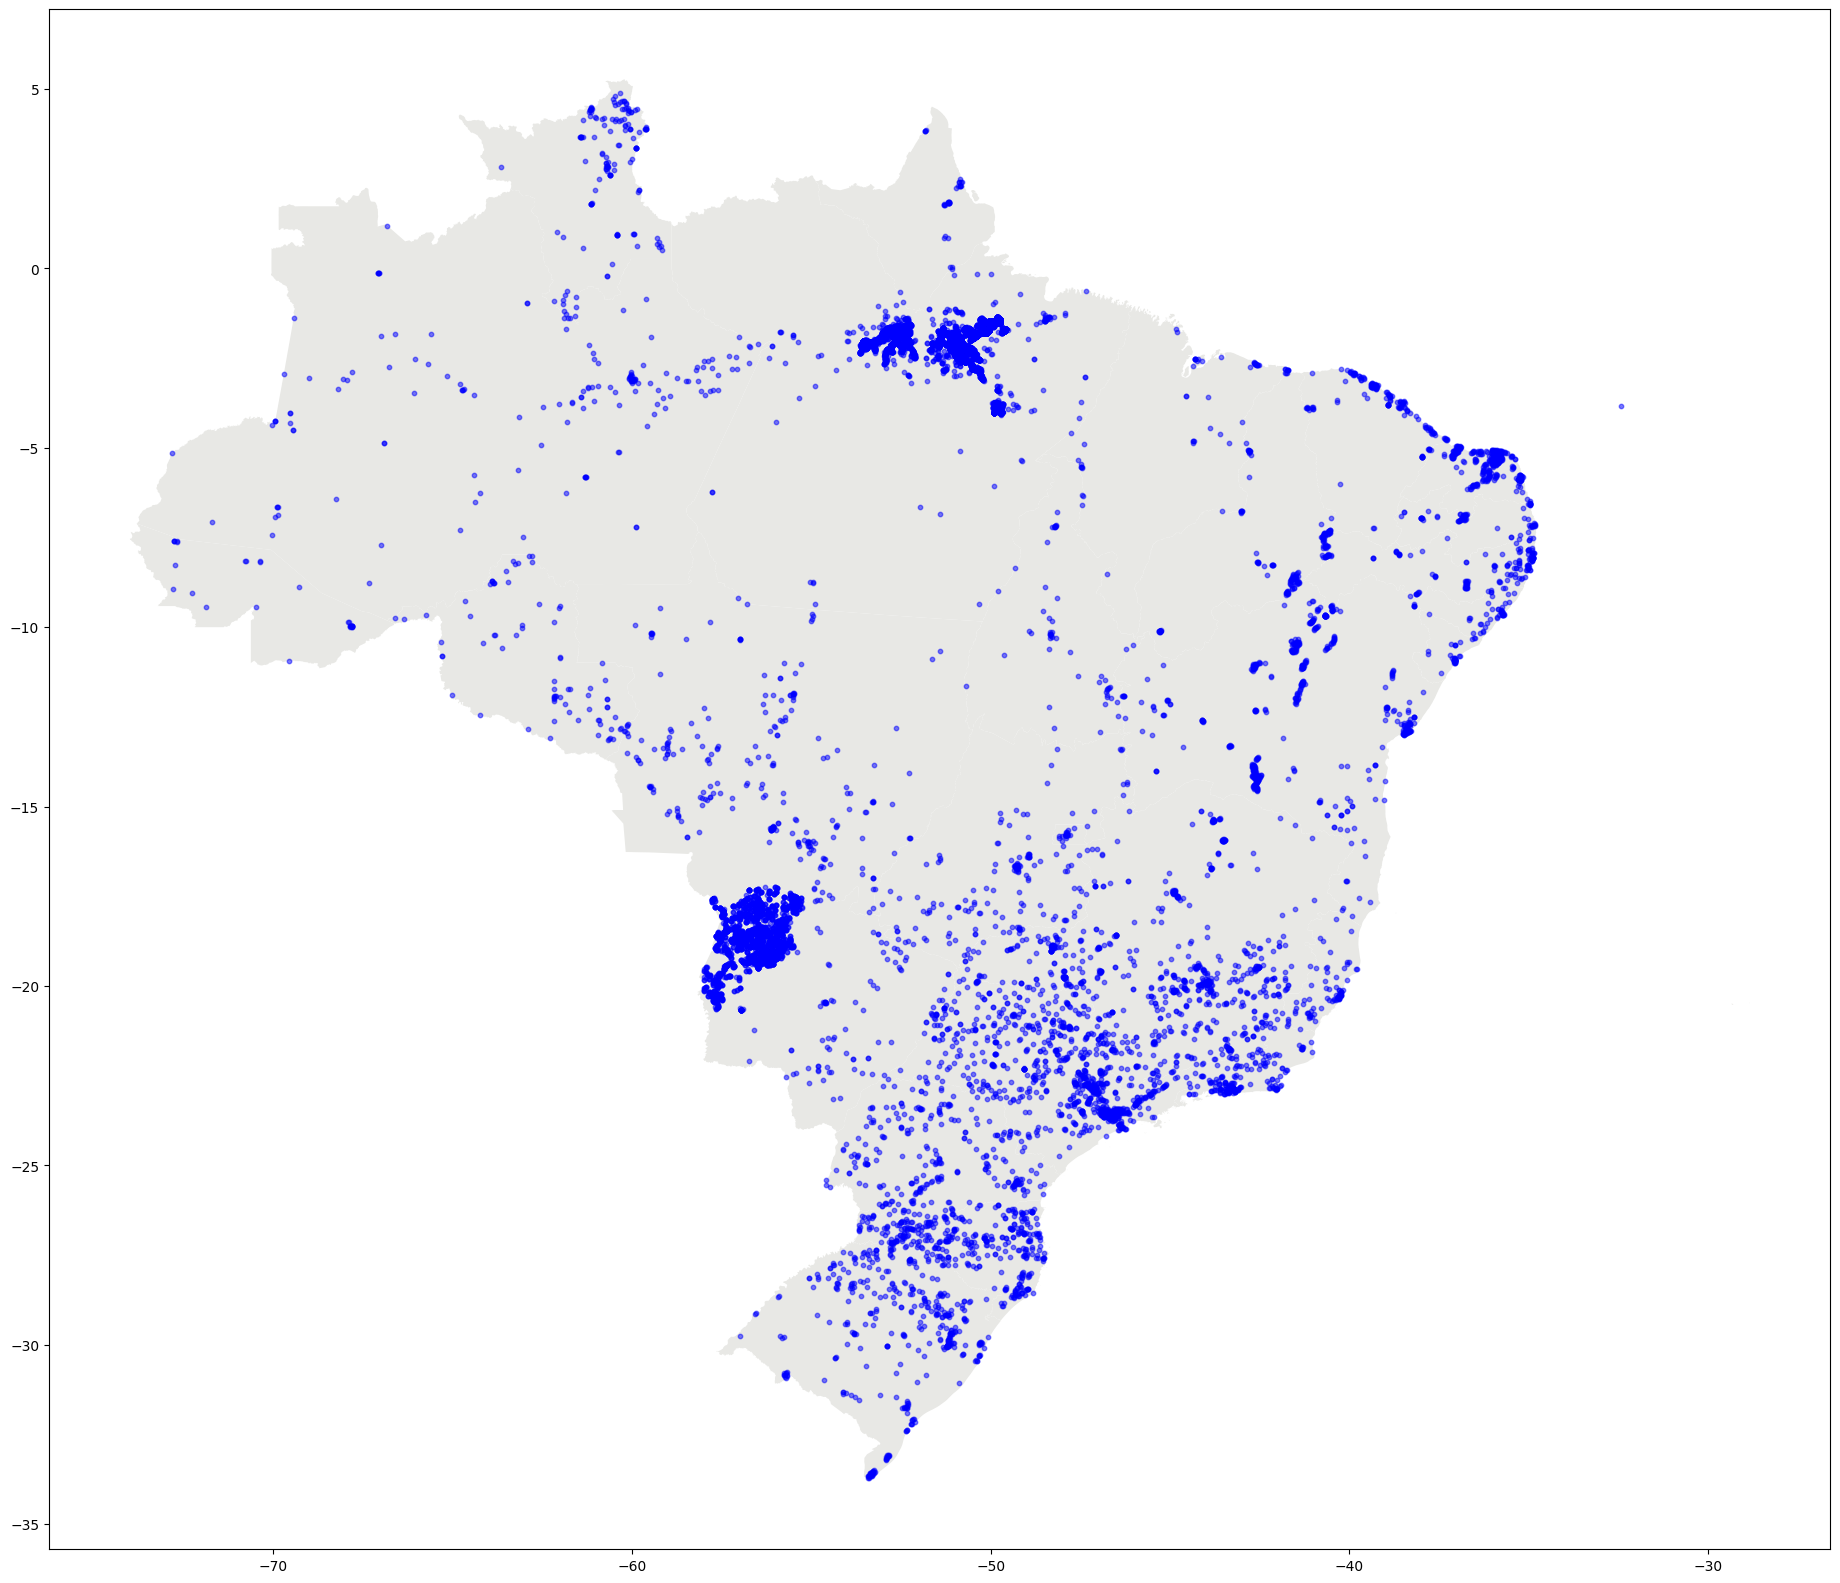

In [77]:
geometria_usinas = [Point(coords) for coords in zip(df_usinas['NumCoordEEmpreendimento'], df_usinas['NumCoordNEmpreendimento'])]
geo_df_usinas = gpd.GeoDataFrame(df_usinas, geometry = geometria_usinas)

figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, color="#e8e8e5")
geo_df_usinas.plot(ax = eixo, markersize = 10, color = "blue", alpha = 0.5)

In [78]:
tipos_de_usina = ["bio_agro","bio_liquido","bio_floresta","bio_animal","bio_residuo",
                  "eolica",
                  "petroleo","carvao","gas","outros_fosseis",
                  "nuclear",
                  "solar",
                  "hidrica"]
rotulos = ["Agroindustriais","Biocombustíveis líquidos","Floresta","Resíduos animais","Resíduos sólidos urbanos",
          "Cinética do vento",
           "Petróleo","Carvão mineral","Gás natural","Outros Fósseis",
           "Urânio",
           "Radiação solar",
           "Potencial hidráulico"]

cores = ["#0aa648", "#0aa648", "#0aa648", "#0aa648", "#0aa648",
        "#ff67f1",
        "#ff000d", "#ff000d", "#ff000d", "#ff000d",
        "#9300ff",
        "#f5ca0a",
        "#3771c8"]

geo_df_dict = {}
for tipo_de_usina, rotulo, cor in zip(tipos_de_usina, rotulos, cores):
    geo_df_dict[tipo_de_usina]={
        "rotulo":rotulo,
        "filtro":df_usinas[(df_usinas["DscFonteCombustivel"]==rotulo)],
        "cor":cor
    }
    

for key in geo_df_dict.keys():
    filtro = geo_df_dict[key]["filtro"]
    geo_df_dict[key]["geometria"] = [Point(coords) for coords in zip(filtro['NumCoordEEmpreendimento'], filtro['NumCoordNEmpreendimento'])]
    geometria = geo_df_dict[key]["geometria"]
    geo_df_dict[key]["geo_df"] = gpd.GeoDataFrame(filtro, geometry = geometria)

#### Visualização da localização dos empreendimentos de geração no mapa do Brasil, coloridas de acordo com a fonte de energia

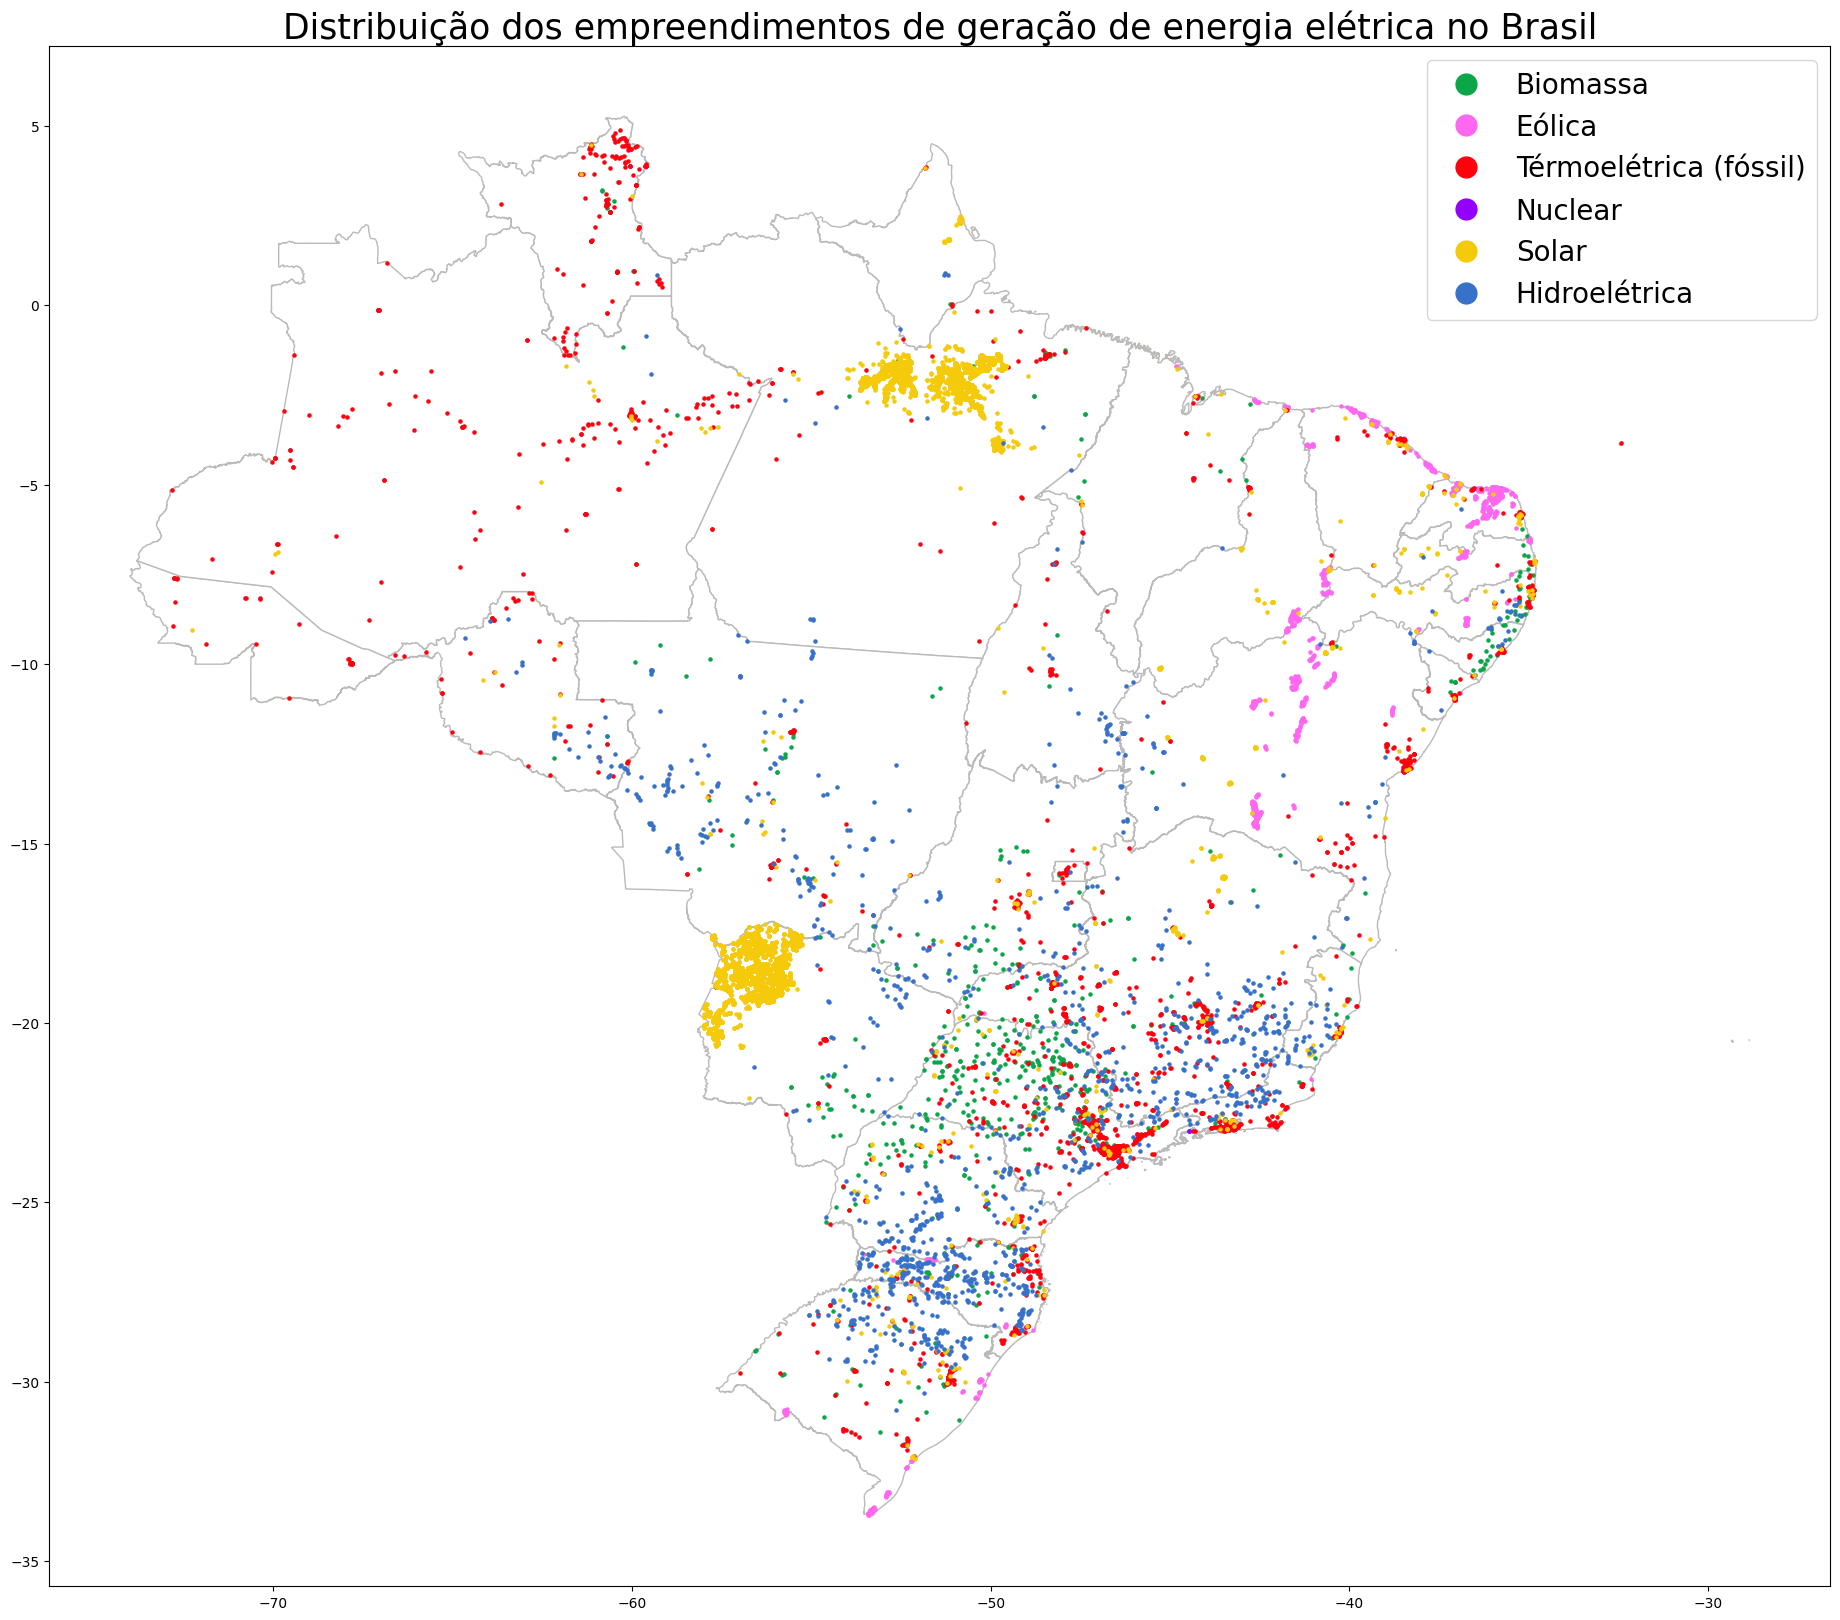

In [79]:
figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, edgecolor="#bbbab8", facecolor="white")
for key in geo_df_dict.keys():
    cor = geo_df_dict[key]["cor"]
    geo_df_dict[key]["geo_df"].plot(ax = eixo, markersize = 5, color = cor, alpha = 1)
    
eixo.set_title("Distribuição dos empreendimentos de geração de energia elétrica no Brasil", size = 25);

# Criando uma legenda adaptada de forma manual
# Fontes: 
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# https://www.freecodecamp.org/news/how-to-change-legend-fontsize-in-matplotlib

points = [Line2D([0], [0], label="Biomassa", marker="o", markersize=15, markeredgecolor="#0aa648", markerfacecolor="#0aa648", linestyle=""),
          Line2D([0], [0], label="Eólica", marker="o", markersize=15, markeredgecolor="#ff67f1", markerfacecolor="#ff67f1", linestyle=""),
          Line2D([0], [0], label="Térmoelétrica (fóssil)", marker="o", markersize=15, markeredgecolor="#ff000d", markerfacecolor="#ff000d", linestyle=""),
          Line2D([0], [0], label="Nuclear", marker="o", markersize=15, markeredgecolor="#9300ff", markerfacecolor="#9300ff", linestyle=""),
          Line2D([0], [0], label="Solar", marker="o", markersize=15, markeredgecolor="#f5ca0a", markerfacecolor="#f5ca0a", linestyle=""),
          Line2D([0], [0], label="Hidroelétrica", marker="o", markersize=15, markeredgecolor ="#3771c8", markerfacecolor="#3771c8", linestyle=""),
         ]
plt.legend(handles=points, fontsize = 20);

#### Visualização dos empreendimentos de geração com potência outorgada maior que 1 MW, coloridas de acordo com a fonte de energia

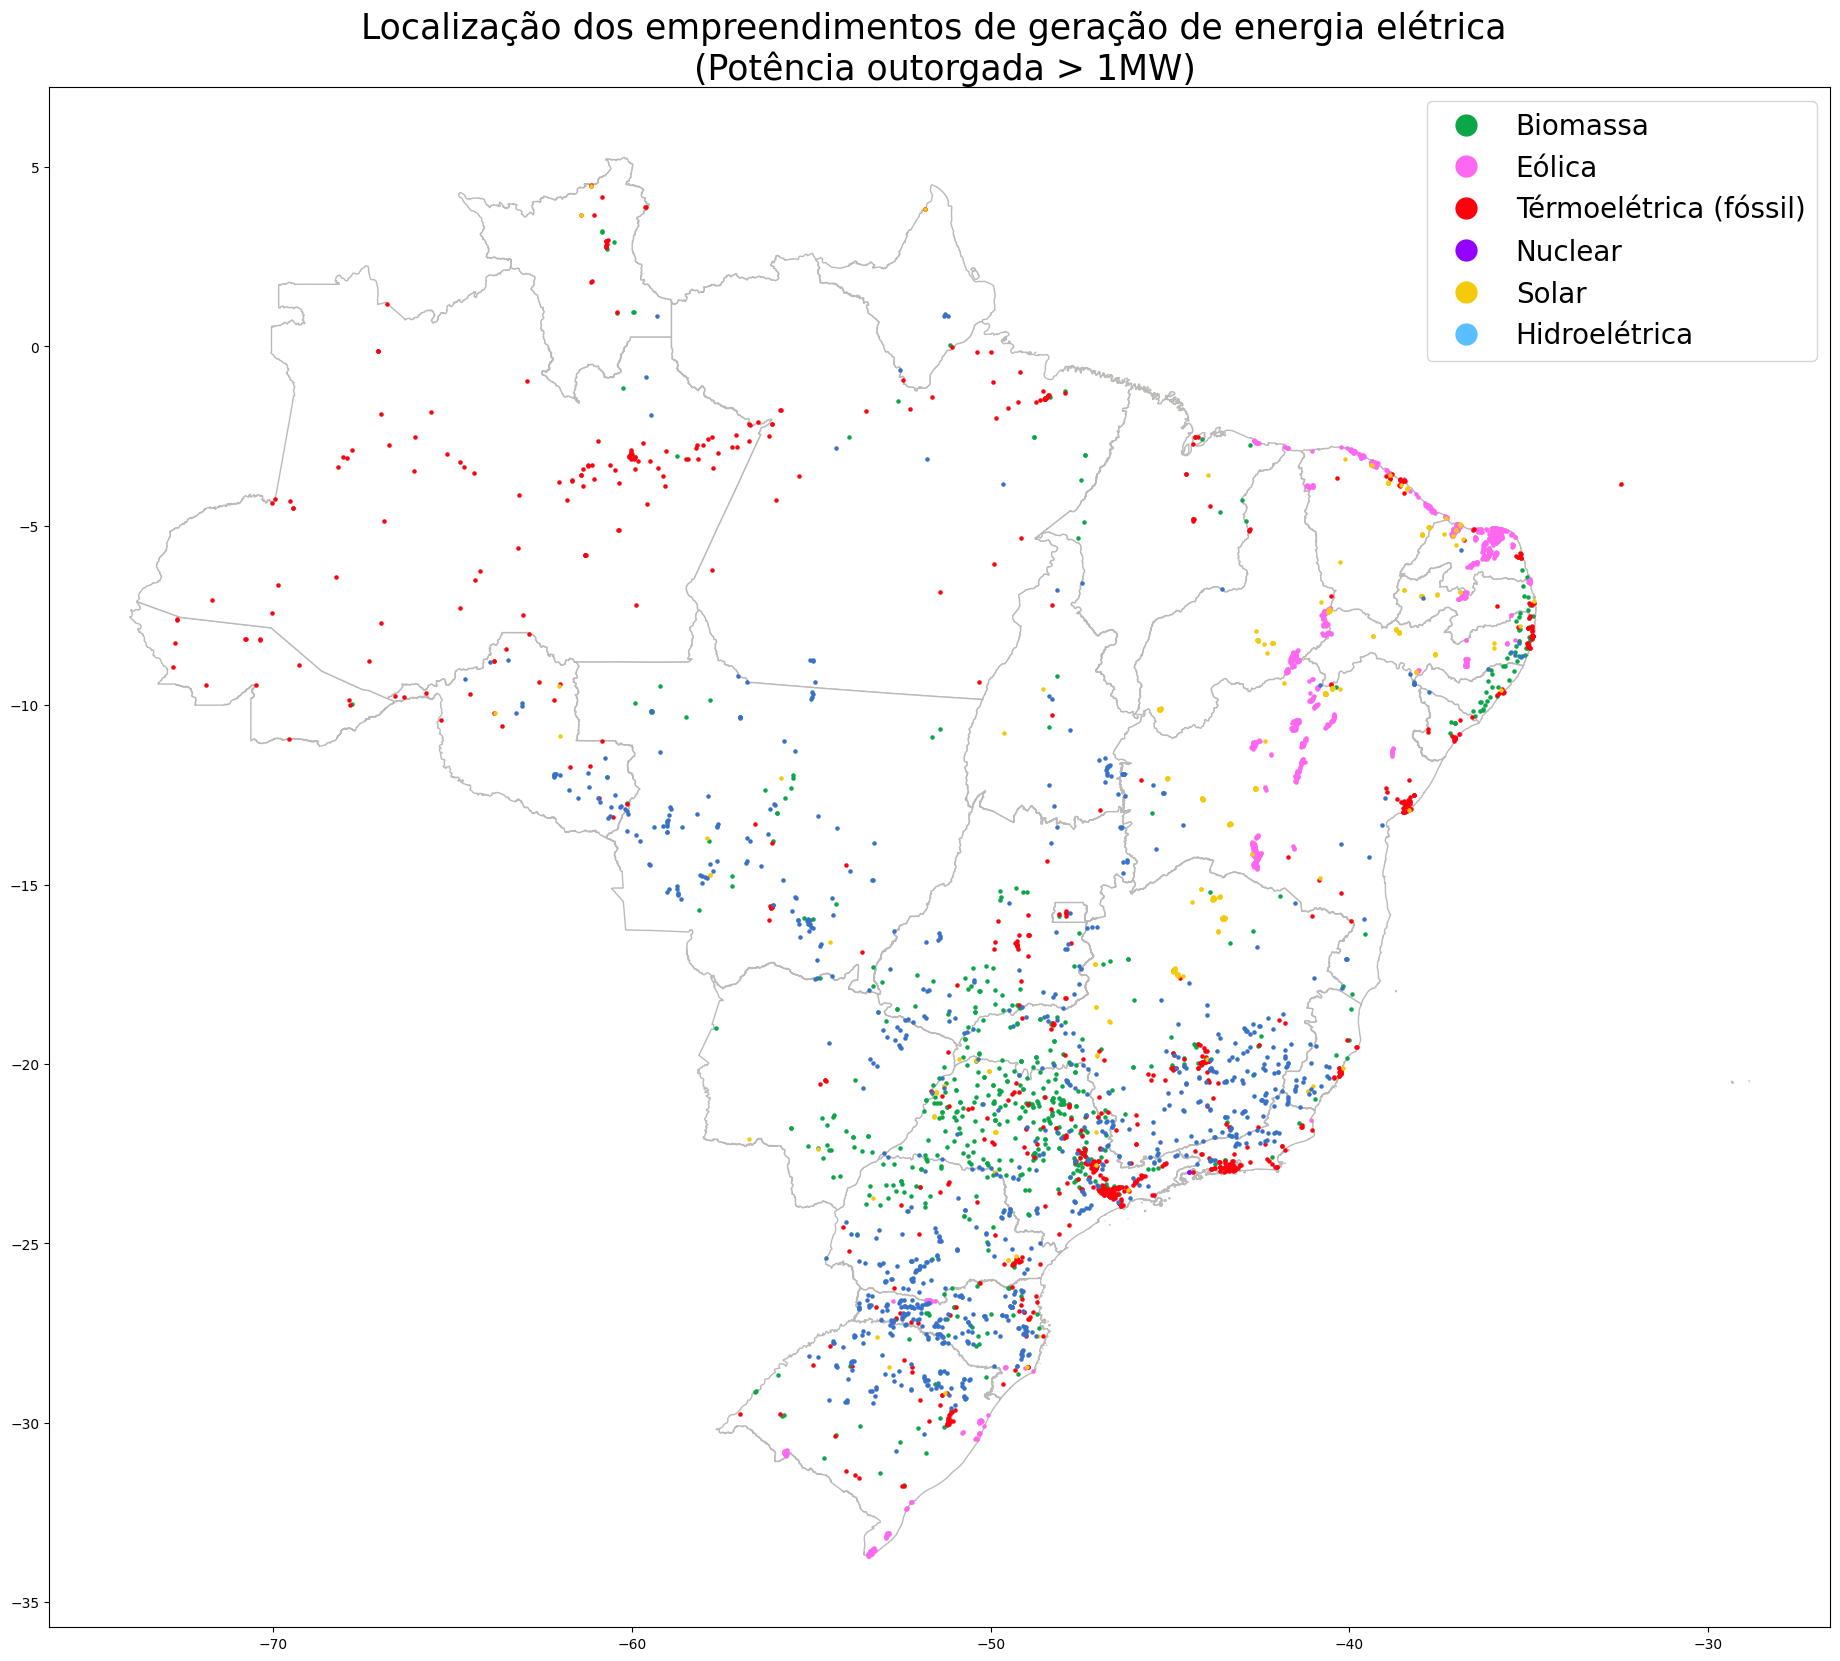

In [80]:
# Selecionando as usinas com potência outorgada maior que 1 MW
df_usinas_maiores = df_usinas[(df_usinas["MdaPotenciaOutorgadaKw"]>1000)]
    
geo_df_dict_maiores = {}
for tipo_de_usina, rotulo, cor in zip(tipos_de_usina, rotulos, cores):
    geo_df_dict_maiores[tipo_de_usina]={
        "rotulo":rotulo,
        "filtro":df_usinas_maiores[(df_usinas_maiores["DscFonteCombustivel"]==rotulo)],
        "cor":cor
    }
    

for key in geo_df_dict_maiores.keys():
    filtro = geo_df_dict_maiores[key]["filtro"]
    geo_df_dict_maiores[key]["geometria"] = [Point(coords) for coords in zip(filtro['NumCoordEEmpreendimento'], filtro['NumCoordNEmpreendimento'])]
    geometria = geo_df_dict_maiores[key]["geometria"]
    geo_df_dict_maiores[key]["geo_df"] = gpd.GeoDataFrame(filtro, geometry = geometria)
    


figura, eixo = plt.subplots()
figura.set_figheight(20)
figura.set_figwidth(40)
brasil_map.plot(ax = eixo, edgecolor="#bbbab8", facecolor="white")
for key in geo_df_dict_maiores.keys():
    cor = geo_df_dict_maiores[key]["cor"]
    geo_df_dict_maiores[key]["geo_df"].plot(ax = eixo, markersize = 5, color = cor, alpha = 1)
    
eixo.set_title("Localização dos empreendimentos de geração de energia elétrica \n (Potência outorgada > 1MW)", size = 25);
    
# Criando uma legenda adaptada de forma manual
# Fontes: 
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
# https://www.freecodecamp.org/news/how-to-change-legend-fontsize-in-matplotlib

points = [Line2D([0], [0], label="Biomassa", marker="o", markersize=15, markeredgecolor="#0aa648", markerfacecolor="#0aa648", linestyle=""),
          Line2D([0], [0], label="Eólica", marker="o", markersize=15, markeredgecolor="#ff67f1", markerfacecolor="#ff67f1", linestyle=""),
          Line2D([0], [0], label="Térmoelétrica (fóssil)", marker="o", markersize=15, markeredgecolor="#ff000d", markerfacecolor="#ff000d", linestyle=""),
          Line2D([0], [0], label="Nuclear", marker="o", markersize=15, markeredgecolor="#9300ff", markerfacecolor="#9300ff", linestyle=""),
          Line2D([0], [0], label="Solar", marker="o", markersize=15, markeredgecolor="#f5ca0a", markerfacecolor="#f5ca0a", linestyle=""),
          Line2D([0], [0], label="Hidroelétrica", marker="o", markersize=15, markeredgecolor ="#59bfff", markerfacecolor="#59bfff", linestyle=""),
         ]
plt.legend(handles=points, fontsize = 20);